# Red Wine Quality Prediction Project

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [10]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [11]:
# for mising values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

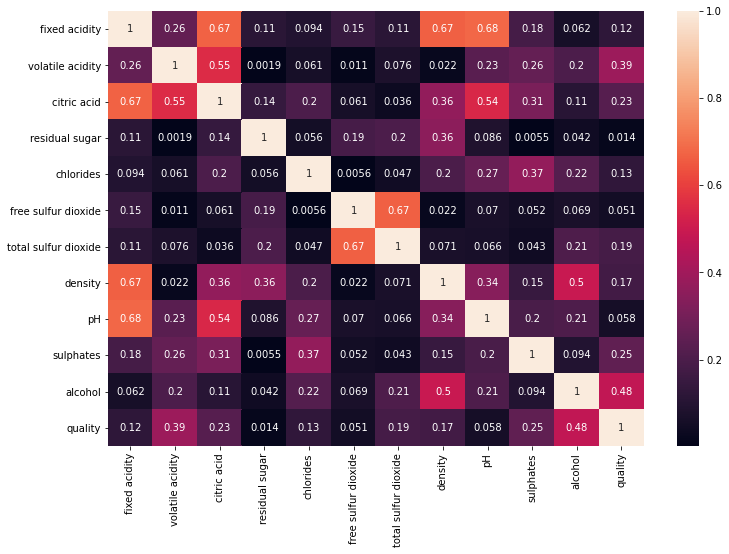

In [12]:
# plotting heat map to to visualize and find the co-efficient of multicollinearity
df_corr=data.corr().abs() # code will get the coefficient of one variable vs all other variable
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show

In [13]:
X=data.drop(columns=['quality'])
y= data['quality']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=41)

In [15]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================== Train Result====================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n================== Test Result====================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        

In [16]:
# model initiation
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
# call the function and pass dataset to check train and test score
metric_score(clf, x_train,x_test,y_train,y_test, train=True) # This is for training score

metric_score(clf, x_train,x_test,y_train,y_test, train=False) # This is for testing score




================== Train Result====================
Accuracy Score: 100.00%

================== Test Result====================
Accuracy Score: 61.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.17      0.33      0.22         3
           4       0.07      0.09      0.08        11
           5       0.69      0.68      0.68       157
           6       0.65      0.62      0.63       168
           7       0.53      0.56      0.55        57
           8       0.14      0.25      0.18         4

    accuracy                           0.61       400
   macro avg       0.38      0.42      0.39       400
weighted avg       0.63      0.61      0.62       400



In [18]:
# hyperparameter tuning
grid_param ={'criterion': ['gini', 'entropy'], 
            'max_depth': range(10,15),
            'min_samples_leaf': range(2,6),
            'min_samples_split': range(3,8),
            'max_leaf_nodes': range(5,10)}

In [19]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,cv=5, n_jobs= -1)

In [20]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [21]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [23]:
# Initiate Decision Tree Classifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split =3, max_depth=10, max_leaf_nodes=7, min_samples_leaf=2)

# train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

In [24]:
# call the function and pass dataset to check train and test score
metric_score(clf, x_train,x_test,y_train,y_test, train=True) # This is for training score

metric_score(clf, x_train,x_test,y_train,y_test, train=False) # This is for testing score


================== Train Result====================
Accuracy Score: 58.88%

================== Test Result====================
Accuracy Score: 54.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.54      0.76      0.63       157
           6       0.51      0.43      0.47       168
           7       0.63      0.42      0.51        57
           8       0.00      0.00      0.00         4

    accuracy                           0.54       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.52      0.54      0.52       400

